## GA SESSIONS

Данные ***ga_sessions*** содержат информацию о посещении потенциальными клиентами сайта «СберАвтоподписка». А именно: дату, время, колличество посещений, канал и тип привлечения, устройство, используемое для входа, браузер, локацию. Эти данные позволят нарисовать портрет посетителя.

#### Реклама в социальных сетях — все визиты с 
ga_sessions.utm_source in
('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm').


# 0. Импорт необходимых библиотек

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import FormatStrFormatter
from scipy import stats

# 1. Загрузка исходного файла ga_sessions

**Описание атрибутов:**

*Одна строка = один визит на сайт.*
- session_id — ID визита;
- client_id — ID посетителя;
- visit_date — дата визита;
- visit_time — время визита;
- visit_number — порядковый номер визита клиента;
- utm_source — канал привлечения;
- utm_medium — тип привлечения;
- utm_campaign — рекламная кампания;
- utm_adconten;
- utm_keyword — ключевое слово;
- device_category — тип устройства;
- device_os — ОС устройства;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_browser — браузер;
- geo_country — страна;
- geo_city — город.

In [12]:
df_sessions = pd.read_csv('data/ga_sessions.csv', low_memory=False)
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


# 2. Data preparation

## 2.1 Data Cleaning

##### Создание копии исходного файла

In [13]:
df_s = df_sessions.copy()
print(f'Размер выборки: {df_s.shape[0]}, {df_s.shape[1]}')
df_s.head()

Размер выборки: 1860042, 18


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


###### Проверка на наличие дубликатов

In [14]:
print(f'Количество дубликатов в ga_sessions: {df_s.duplicated().sum()}')

Количество дубликатов в ga_sessions: 0


##### Информация по выборке

In [15]:
print('Информация о выборке: \n')
df_s.info()

Информация о выборке: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


##### Проверка на наличие пропущенных значений

In [16]:
missing_values = ((df_s.isna().sum()/len(df_s)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
geo_city                     0.000000
dtype: float64

##### Преобразование колонок visit_date и visit_time в соответствующий формат дат

In [17]:
df_s['visit_date_time'] = pd.to_datetime(df_s['visit_date'] + ' ' + df_s['visit_time'])

##### Сводная таблица ga_sessions

In [18]:
df_s.describe(include='all').loc[['count', 'unique', 'freq', 'top']].T

,count,unique,freq,top
session_id,1860042,1860042,1,9055434745589932991.1637753792.1637753792
client_id,1860042,1391719,462,1750498477.1629450062
visit_date,1860042,226,39453,2021-05-24
visit_time,1860042,85318,61067,12:00:00
visit_number,1860042.0,NaN,NaN,NaN
utm_source,1859945,293,578290,ZpYIoDJMcFzVoPFsHGJL
utm_medium,1860042,56,552272,banner
utm_campaign,1640439,412,463481,LTuZkdKfxRGVceoWkVyg
utm_adcontent,1524427,286,1006599,JNHcPlZPxEMWDnRiyoBf
utm_keyword,777981,1219,506819,puhZPIYqKXeFPaUviSjo


**Поверхностное изучение датасета показало:**
1. Таблица состоит из **1860042** строк и **18** колонок. Дубликатов нет.
2. Колонка **session_id** не содержит пропусков. Все значения колонки уникальны. Поле **session_id** является первичным ключом.
3. Колонки **client_id** и **device_screen_resolution** содержат слишком много уникальных значений. Вероятно, они не будут использоваться в дальнейших исследованиях.
4. Признаки **visit_date** и **visit_time** преобразованы в единый формат дат и будут удалены из окончательного датасета.
4. Признаки **utm_source**, **utm_campaign**, **utm_adcontent**, **utm_keyword** и **device_model** зашифрованы.
5. Основным каналом привлечения (**utm_source**) является **ZpYIoDJMcFzVoPFsHGJL**.
6. Самый популярный тип привлечения - **banner**.
7. Столбцы **device_category**, **device_os**, **device_brand** содержат несколько протеворечивые сведения, природу которых предстоит рассмотреть подробнее.
8. Самый популярный браузер - **Chrome**.
9. Страна и город, где чаще всего интересуются сервисом - Россия, Москва.

***`Таким образом, предварительный портрет потенциального пользователя сервиса - это москвич, пользующийся iPhone. Однако, для дальнейшего анализа следует изучить каждый признак подробнее`***.


### `visit_number - порядковый номер визита посетителя`  

In [19]:
df_s['visit_number'].value_counts()

1      1376349
2       235656
3        81068
4        41666
5        24271
        ...   
419          1
420          1
421          1
422          1
564          1
Name: visit_number, Length: 537, dtype: int64

In [20]:
df_s['visit_number'].describe().apply(lambda x: f'{x:0.2f}')

count    1860042.00
mean           2.71
std           11.83
min            1.00
25%            1.00
50%            1.00
75%            2.00
max          564.00
Name: visit_number, dtype: object

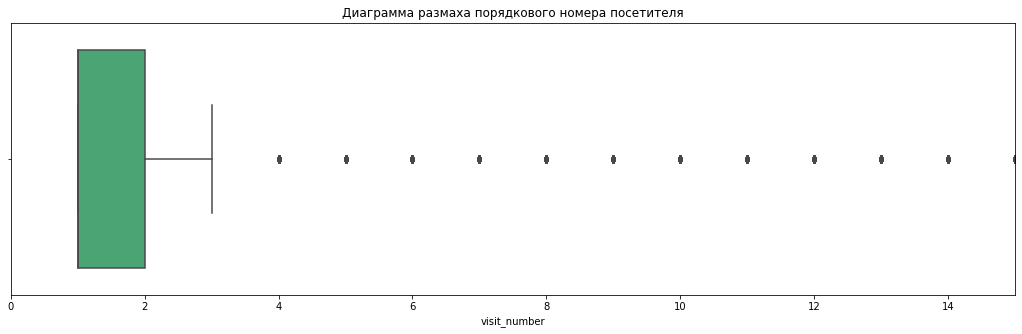

In [21]:
plt.figure(figsize = (18, 5)) 
plt.title('Диаграмма размаха порядкового номера посетителя')
plt.xlim(0, 15)
my_color = ['mediumseagreen']
sns.set_palette(my_color)
sns.boxplot(data = df_s, x = 'visit_number');

Данные **visit_number** говорят о том, большинство посетителей зашли на сайт только однажды. Тем не менее, есть и такой, кто посетил его 564 раза. Возможно, дальнейшие исследования покажут, посетителей с каким количеством визитов на сайт оказалось больше всего среди пользвателей сервиса.

### `utm_source - канал привлечения `

In [22]:
df_s.utm_source.describe()

count                  1859945
unique                     293
top       ZpYIoDJMcFzVoPFsHGJL
freq                    578290
Name: utm_source, dtype: object

In [23]:
missings_source = df_s['utm_source'].isna().sum()
print(f'Количество пустых значений в `utm_source`: {missings_source}')

Количество пустых значений в `utm_source`: 97


In [24]:
df_s.utm_source.value_counts(dropna=False)

ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: utm_source, Length: 294, dtype: int64

In [25]:
(df_s.groupby('utm_source').size() / len(df_s) * 100).sort_values(ascending=False).head(10)

utm_source
ZpYIoDJMcFzVoPFsHGJL    31.090158
fDLlAcSmythWSCVMvqvL    16.159581
kjsLglQLzykiRbcDiGcD    14.319784
MvfHsxITijuriZxsqZqt    10.010473
BHcvLfOaCWvWTykYqHVe     6.253622
bByPQxmDaMXgpHeypKSM     5.499177
QxAxdyPLuQMEcrdZWdWb     2.764185
aXQzDWsJuGXeBXexNHjc     1.674801
jaSOmLICuBzCFqHfBdRg     1.572061
RmEBuqrriAfAVsLQQmhk     1.508299
dtype: float64

In [26]:
utm_source_social = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
                     'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

df_s['utm_source_social'] = df_s.utm_source.apply(lambda x: 1 if x in utm_source_social else 0)

In [27]:
df_s.utm_source_social.value_counts(dropna=False)

0    1585815
1     274227
Name: utm_source_social, dtype: int64

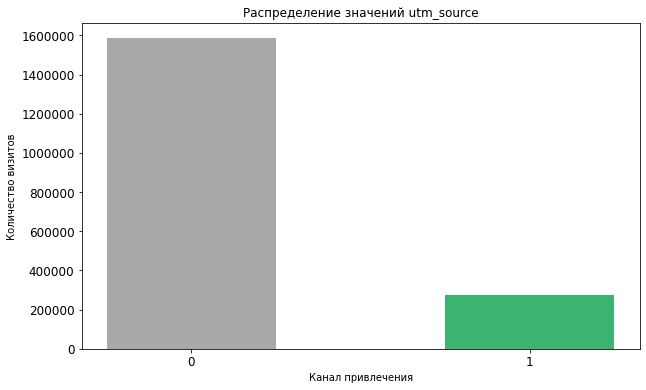

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_s['utm_source_social'].unique(), df_s['utm_source_social'].value_counts(), 
           width=0.5, color=['darkgrey', 'mediumseagreen'])
ax.set_xlabel('Канал привлечения')
ax.set_ylabel('Количество визитов')
ax.set_title('Распределение значений utm_source')
ax.tick_params(axis='both', labelsize=12)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [29]:
df_s.groupby('utm_source_social').size() / len(df_s) * 100

utm_source_social
0    85.256946
1    14.743054
dtype: float64

Признак **utm_source** содержит **97** пропусков. После объединения датасетов отавшиеся пропуски будут заменены на **other**.  

Уникальных значений - **293**. При этом львиная доля (более **80%**) представлена  шестью каналами привлечения. Самым попоулярным ресурсом является **ZpYIoDJMcFzVoPFsHGJL**. На его долю приходится порядка **31%** или **578290** привлечений.


Из социальных сетей прилекается только около **15%** трафика. 

### `utm_medium - тип привлечения`

In [30]:
df_s.utm_medium.describe()

count     1860042
unique         56
top        banner
freq       552272
Name: utm_medium, dtype: object

In [31]:
df_s['utm_medium'].value_counts(dropna=False).head(25)

banner             552272
cpc                434794
(none)             300575
cpm                242083
referral           152050
organic             63034
email               29240
push                28035
stories             10582
cpv                  8022
blogger_channel      8015
smartbanner          6794
blogger_stories      4312
cpa                  4279
tg                   4011
app                  2836
post                 2326
smm                  1985
outlook              1332
clicks                934
blogger_header        771
(not set)             480
info_text             343
sms                   239
landing               134
Name: utm_medium, dtype: int64

In [32]:
df_s['traffic_type'] = df_s.utm_medium.apply(lambda x:
                                          'organic' if x in ['organic', 'referral', '(none)'] else 'paid')

In [33]:
df_s.traffic_type.value_counts(dropna=False)

paid       1344383
organic     515659
Name: traffic_type, dtype: int64

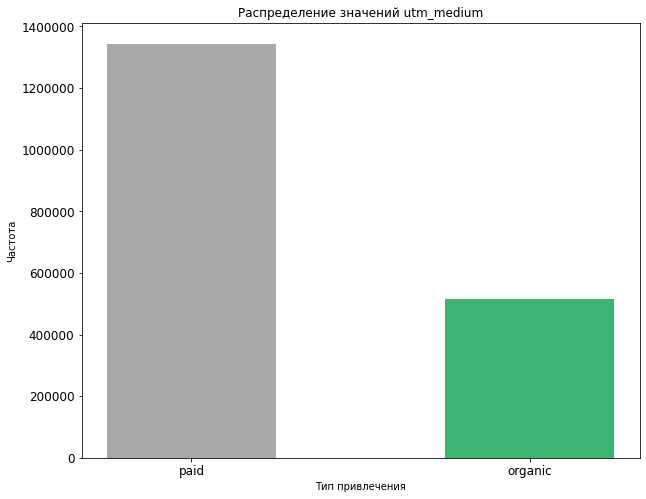

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df_s['traffic_type'].unique(), df_s['traffic_type'].value_counts(), width=0.5, color=['darkgrey', 'mediumseagreen'])
ax.set_xlabel('Тип привлечения')
ax.set_ylabel('Частота')
ax.set_title('Распределение значений utm_medium')
ax.tick_params(axis='both', labelsize=12)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [35]:
df_s.groupby('traffic_type').size() / len(df_s) * 100

traffic_type
organic    27.722976
paid       72.277024
dtype: float64

Данные содержат **56** уникальных значений. 

Самые популярные типы трафика: **banner, cpc, (none), cpm, refferal, organic**.

По условию задачи **organic, refferal и (none)** относятся к органическому трафику. 

Органический трафик составляет около 28%. 

### `utm_campaign - рекламная кампания`

In [36]:
df_s.utm_campaign.describe()

count                  1640439
unique                     412
top       LTuZkdKfxRGVceoWkVyg
freq                    463481
Name: utm_campaign, dtype: object

In [37]:
missings_compaign = df_s['utm_campaign'].isna().sum()
percent = missings_compaign / len(df_s) * 100
print(f'Количество незаполненных значений в utm_campaign: {missings_compaign} - {percent:.2f}%')

Количество незаполненных значений в utm_campaign: 219603 - 11.81%


In [38]:
df_s['utm_campaign'].value_counts(dropna=False).head(10)

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
XHNUiSKKGTEpSAlaVMFQ     24524
okTXSMadDkjvntEHzIjp     24511
SgIUDYUKnyWHVowUOqid     22841
sbJRYgVfvcnqKJNDDYIr     20188
Name: utm_campaign, dtype: int64

Данные о рекламных компаниях зашифрованы. Содержат **412** уникальных значений. Около **12%** значений пропущено.

### `utm_adcontent`

In [39]:
df_s.utm_adcontent.describe()

count                  1524427
unique                     286
top       JNHcPlZPxEMWDnRiyoBf
freq                   1006599
Name: utm_adcontent, dtype: object

In [40]:
missings_adcontent = df_s['utm_adcontent'].isna().sum()
percent = missings_adcontent / len(df_s) * 100
print(f'Количество незаполненных значений в utm_adcontent`: {missings_adcontent} - {percent:.2f}%')

Количество незаполненных значений в utm_adcontent`: 335615 - 18.04%


In [41]:
df_s['utm_adcontent'].value_counts(dropna=False).head(10)

JNHcPlZPxEMWDnRiyoBf    1006599
NaN                      335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
TuyPWsGQruPMpKvRxeBF      18189
UxrnyMlRBSOhOjytXnMG      13583
dUuXlWzvmhDSyclWRhNP      10280
yYdBRbPmBMUZHXwqGxNx       9700
Name: utm_adcontent, dtype: int64

В колонке **utm_adcontent** 286 уникальных значения, около 18% пропущено. Больше половины приходится на **JNHcPlZPxEMWDnRiyoBf**.

Однако, поскольку значения зашифрованы и из названия не понятно, какую пользу можно извлечь из этой информации,  колонка **utm_adcontent**  в окончательном датасете участвовать не будет.

### `utm_keyword - ключевое слово`

In [42]:
df_s.utm_keyword.describe()

count                   777981
unique                    1219
top       puhZPIYqKXeFPaUviSjo
freq                    506819
Name: utm_keyword, dtype: object

In [43]:
missings_keyword = df_s['utm_keyword'].isna().sum()
percent = missings_keyword / len(df_s) * 100
print(f'Количество незаполненных значений в utm_adcontent: {missings_keyword} - {percent:.2f}%')

Количество незаполненных значений в utm_adcontent: 1082061 - 58.17%


In [44]:
df_s['utm_keyword'].value_counts(dropna=False).head(10)

NaN                     1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
hAmNSZmQkKQKAjZEGlgb      11297
UKNBOHebRIIsQRsjNKay      10946
IGUCNvHlhfHpROGclCit       7568
RkpOyeEPgcMBSDuHLQcj       6978
JajANoFxoqXfKRNBUhzx       6758
Name: utm_keyword, dtype: int64

Колонка **utm_keyword** зашифрована. Содержит 1219 уникальных значения, что довольно много и затрудняет использование данных в анализе. К тому же, пропущено более 58% . В списке наиболее часто встречающихся значений на втором месте, после **NaN**, находится **puhZPIYqKXeFPaUviSjo**.

Учитывая всё вышесказанное, колонка **utm_keyword**  в окончательном датасете участвовать не будет.

 ### `device_category — тип устройства` 

In [45]:
df_s.device_category.describe()

count     1860042
unique          3
top        mobile
freq      1474871
Name: device_category, dtype: object

In [46]:
dev_cat = df_s.groupby(['device_category'], as_index=False)[['session_id']].count()
dev_cat = dev_cat.rename(columns={'session_id': 'count'})
dev_cat.sort_values(by='count', ascending=False)

,device_category,count
1,mobile,1474871
0,desktop,366863
2,tablet,18308


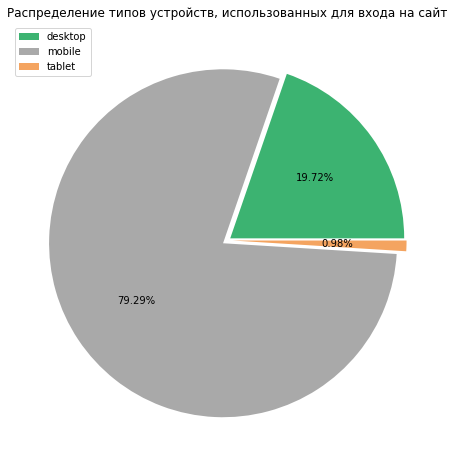

In [47]:
explode = [0.02, 0.03, 0.03]
colors = ['mediumseagreen', 'darkgrey', 'sandybrown']
plt.figure(figsize=(15, 8))
plt.pie(dev_cat['count'], 
        labels = dev_cat['device_category'],labeldistance=None, autopct = '%.2f%%', colors=colors, explode=explode)
plt.title("Распределение типов устройств, использованных для входа на сайт")
plt.legend()
plt.show();

Пропущенных значений в колонке **device_category** нет.  
Уникальных значений всего **3**: планшенты, мобильные и десктопные устройства. 
Причём через **мобильное приложение** СберАвто поьзователи заходили на сайт почти в 4 раза чаще, чем через стационарные **комрьютеры и ноутбуки**. А вот с **планшетов** заходили лишь около 1% пользователей.

###  `device_os — ОС устройства`

In [48]:
df_s.device_os.describe()

count      789904
unique         13
top       Android
freq       464054
Name: device_os, dtype: object

In [49]:
missings_os = df_s['device_os'].isna().sum()
percent = missings_os / len(df_s) * 100
print(f'Количество незаполненных значений в device_os: {missings_os} - {percent:.2f}%')

Количество незаполненных значений в device_os: 1070138 - 57.53%


In [50]:
df_s['device_os'].value_counts(dropna=False)

NaN              1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: device_os, dtype: int64

  К сожалению, данные содержат более **57%** пропусков. Что не позволит воспользоваться ими в дальнейшем. Имеющаяся же информация готорит о том, что основные **ОС - Android, iOS и Windows**. 
  В последующих исследованиях колонка **device_os** участвовать не будет.

### `device_brand — марка устройства`

In [51]:
df_s.device_brand.describe()

count     1492864
unique        205
top         Apple
freq       551088
Name: device_brand, dtype: object

In [52]:
missings_brand = df_s['device_brand'].isna().sum()
percent = missings_brand / len(df_s) * 100
print(f'Количество незаполненных значений в device_brand: {missings_brand} - {percent:.2f}%')

Количество незаполненных значений в device_brand: 367178 - 19.74%


In [53]:
device_list = list(df_s.device_category.unique())
for i in device_list:
    print(i)
    print('-'*40)
    print(df_s[df_s['device_category'] == i].device_brand.value_counts(dropna=False).head(),'\n')

mobile
----------------------------------------
Apple      544793
Samsung    327231
Xiaomi     288115
Huawei     182393
Realme      19049
Name: device_brand, dtype: int64 

tablet
----------------------------------------
Apple      6223
Samsung    4955
Huawei     3441
Lenovo     1656
Google      713
Name: device_brand, dtype: int64 

desktop
----------------------------------------
NaN          366721
Apple            72
Huawei           19
Xiaomi           10
(not set)        10
Name: device_brand, dtype: int64 



В колонке пропущено около **20%** значений. Уникальных значений **205**. 

Самыми популярными марками являются:
- среди мобильных телефонов - **Apple, Samsung, Xiaomi, Huawei**;
- среди планшетов - **Apple, Samsung, Huawei, Lenovo**;
- десктопные устройства преимущественно не содержат наименования бренда. 

Решение о том, оставить или удалить данную колонку будет принято после объединения датасетов.

### `device_model — модель устройства`

In [54]:
df_s.device_model.describe()

count                    16338
unique                     104
top       AuMdmADEIoPXiWpTsBEj
freq                      9778
Name: device_model, dtype: object

In [55]:
missings_model = df_s['device_model'].isna().sum()
percent = missings_model / len(df_s) * 100
print(f'Количество незаполненных значений в device_brand: {missings_model} - {percent:.2f}%')

Количество незаполненных значений в device_brand: 1843704 - 99.12%


Использование данных **device_model** нецелесообразно, поскольку пропущено более **99%** значений.

### `device_screen_resolution — разрешение экрана`

In [56]:
df_s.device_screen_resolution.describe()

count     1860042
unique       5039
top       414x896
freq       169090
Name: device_screen_resolution, dtype: object

In [57]:
df_s['device_screen_resolution'].value_counts(dropna=False).head(15)

414x896      169090
1920x1080    125768
375x812      117944
393x851      115454
375x667       93341
360x780       92182
360x800       80547
412x915       74744
360x640       70588
390x844       60827
393x873       52056
360x720       50603
360x760       50467
412x892       43944
428x926       40690
Name: device_screen_resolution, dtype: int64

Данные **device_screen_resolution** содержат очень много уникальных значений  - 5039. Чаще всего используются устройства с небольшим разрешением экрана, что логично, поскольку признак **device_category** уже указал на превалирующее использование мобильных телефонов для входа на сайт. 

Колонка **device_screen_resolution** будет исключена из финального датасета.

### `device_browser — браузер`

In [58]:
df_s.device_browser.describe()

count     1860042
unique         57
top        Chrome
freq      1013436
Name: device_browser, dtype: object

In [59]:
df_s['device_browser'].value_counts(dropna=False)

Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0.21.137 Android

In [60]:
browser = list(df_s.device_browser.value_counts(dropna=False, normalize=True)[df_s.device_browser.value_counts(dropna=False, normalize=True) \
                                                                              .apply(lambda x: f'{x:0.3f}') >= '0.001'].index)

def browser_freq(data):
    if data in browser:
        return data
    return 'Other'

df_s['device_browser'] = df_s.device_browser.apply(browser_freq)
df_s.device_browser.value_counts(dropna=False)

Chrome              1013436
Safari               478562
YaBrowser            133311
Safari (in-app)       69912
Android Webview       55369
Samsung Internet      47309
Opera                 26817
Firefox               16588
Edge                  16065
Other                  2673
Name: device_browser, dtype: int64

В колонке 57 уникальных значения, но, поскольку многие встречаются лишь несколько раз, целесообразно объединить в категорию **Other** те значения, доля которых < 0,1%.

Т.о., самые популярные браузеры - это **Chrome, Safari и YaBrowser**.

### `geo_country — страна`

In [61]:
df_s.geo_country.describe()

count     1860042
unique        166
top        Russia
freq      1800565
Name: geo_country, dtype: object

In [62]:
df_s['geo_country'].value_counts(dropna=False).head(15)

Russia            1800565
United States       11784
Ukraine              9012
Ireland              4034
Belarus              3636
Sweden               2694
Kazakhstan           2279
Germany              2232
Turkey               1953
Netherlands          1549
Uzbekistan           1523
United Kingdom       1462
(not set)            1146
Kyrgyzstan            974
Georgia               935
Name: geo_country, dtype: int64

In [63]:
(df_s.groupby('geo_country').size() / len(df_s) * 100).sort_values(ascending=False).head(15)

geo_country
Russia            96.802384
United States      0.633534
Ukraine            0.484505
Ireland            0.216877
Belarus            0.195479
Sweden             0.144835
Kazakhstan         0.122524
Germany            0.119997
Turkey             0.104998
Netherlands        0.083278
Uzbekistan         0.081880
United Kingdom     0.078600
(not set)          0.061612
Kyrgyzstan         0.052364
Georgia            0.050268
dtype: float64

Данные **geo_country** содержат 166 уникальных значений. Превалирующее количество посещений (>96%) осуществляется из России, что логично, поскольку автомобили предоставляются в пользование только на территории РФ и только гражданам РФ. 
1146 стран имеют значение **(not set)**. Вероятно, эти строки придётся удалить.

### `geo_city — город`

In [64]:
df_s.geo_city.describe()

count     1860042
unique       2548
top        Moscow
freq       805329
Name: geo_city, dtype: object

In [65]:
df_s['geo_city'].value_counts(dropna=False).head(15)

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
Kazan                29531
Samara               24992
Nizhny Novgorod      22227
Ufa                  21679
Novosibirsk          21568
Krasnoyarsk          16346
Chelyabinsk          15951
Tula                 15814
Voronezh             13908
Rostov-on-Don        13886
Name: geo_city, dtype: int64

In [66]:
(df_s.groupby('geo_city').size() / len(df_s) * 100).sort_values(ascending=False).head(15)

geo_city
Moscow              43.296280
Saint Petersburg    15.955984
(not set)            4.202701
Yekaterinburg        1.924043
Krasnodar            1.733455
Kazan                1.587652
Samara               1.343626
Nizhny Novgorod      1.194973
Ufa                  1.165511
Novosibirsk          1.159544
Krasnoyarsk          0.878797
Chelyabinsk          0.857561
Tula                 0.850196
Voronezh             0.747725
Rostov-on-Don        0.746542
dtype: float64

In [67]:
moscow_region_cities = ['Aprelevka', 'Balashikha', 'Beloozyorskiy', 'Chekhov', 'Chernogolovka', 'Dedovsk', 'Dmitrov', 
                 'Dolgoprudny', 'Domodedovo', 'Dubna', 'Dzerzhinsky','Elektrogorsk', 'Elektrostal', 'Elektrougli', 
                 'Fryazino', 'Golitsyno', 'Istra', 'Ivanteyevka', 'Izhevsk', 'Kashira', 'Khimki', 'Khotkovo', 'Klin', 
                 'Kolomna', 'Korolyov', 'Kotelniki', 'Krasnoarmeysk', 'Krasnogorsk', 'Krasnoznamensk', 'Kubinka',
                 'Kurovskoye', 'Likino-Dulyovo', 'Lobnya', 'Losino-Petrovsky', 'Lukhovitsy', 'Lytkarino', 'Lyubertsy', 
                 'Mozhaysk', 'Mytishchi', 'Naro-Fominsk', 'Noginsk', 'Odintsovo', 'Orekhovo-Zuyevo', 
                 'Pavlovsky Posad', 'Podolsk', 'Protvino', 'Pushchino', 'Pushkino', 'Ramenskoye', 'Reutov', 'Ruza',               
                 'Sergiyev Posad', 'Serpukhov', 'Solnechnogorsk', 'Staraya Kupavna', 'Stupino', 'Shchyolkovo', 
                 'Shatura', 'Vidnoye', 'Volokolamsk', 'Voskresensk', 'Yakhroma', 'Zvenigorod']

df_s['region'] = df_s.apply(lambda x: 
                           'Moscow' if x.geo_city == 'Moscow'
                            else 
                            ('Saint Petersburg' if x.geo_city == 'Saint Petersburg'
                             else
                             ('Moscow_region' if x.geo_city in moscow_region_cities
                               else
                                ('Other_Russia' if x.geo_country == 'Russia'
                                 else
                                  ('(not set)' if x.geo_city == '(not set)'
                                   else                                    
                                    'Other_countries')))), axis=1)
                               

In [68]:
(df_s.groupby('region').size() / len(df_s) * 100).sort_values(ascending=False).head(15)

region
Moscow              43.296280
Other_Russia        31.887506
Saint Petersburg    15.955984
Moscow_region        5.662614
Other_countries      2.759400
(not set)            0.438216
dtype: float64

Данные содержат 2548 уникальных значений. Поэтому был создан новый призак **region**, в котором все локации были разделены на 6 позиций: 
- 2 самых крупных по посещаемости города - Москва и Санкт-Петербург, 
- Московская область, 
- остальные Российские города, 
- города, находящиеся не на территории России и 
- пропущенные значения.  

Пропущенных значений оказадлсь около 4%.

43% сессий из Москвы, 15% из Санкт-Петербурга и 5% из Московской области.

### `visit_date_time - дата и время визита` 

In [69]:
df_s['visit_date_time'].describe(datetime_is_numeric=True)

count                          1860042
mean     2021-09-27 01:35:48.891483136
min                2021-05-19 10:00:00
25%                2021-08-02 15:00:00
50%                2021-10-06 18:00:00
75%                2021-11-23 13:37:28
max                2021-12-31 23:59:35
Name: visit_date_time, dtype: object

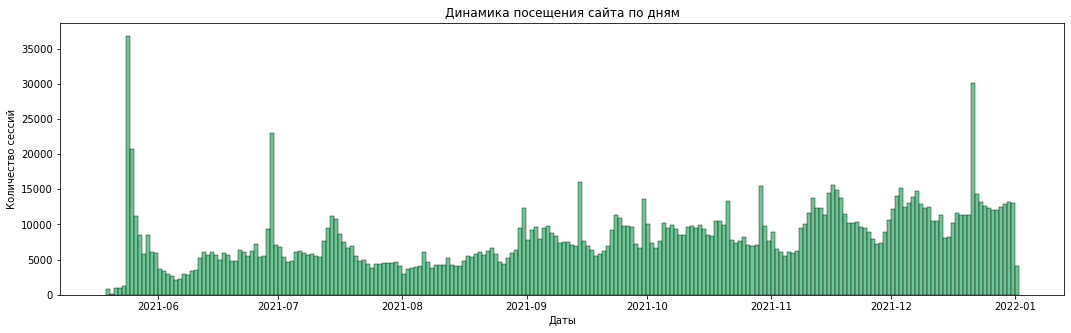

In [71]:
plt.figure(figsize = (18, 5))
sns.histplot(df_s, x='visit_date_time', discrete=True)
plt.xlabel('Даты')
plt.ylabel('Количество сессий')
plt.title('Динамика посещения сайта по дням');

In [72]:
df_s['week'] = df_s.visit_date_time.dt.isocalendar().week

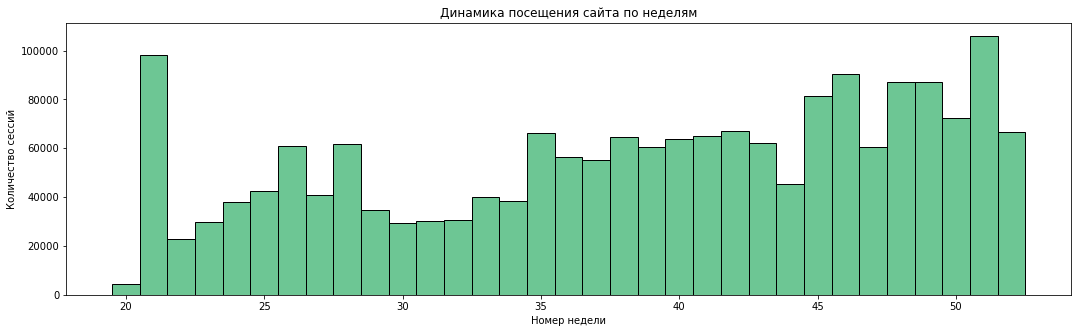

In [73]:
plt.figure(figsize = (18, 5))
sns.histplot(data=df_s, x='week', discrete=True)
plt.xlabel('Номер недели')
plt.ylabel('Количество сессий')
plt.title('Динамика посещения сайта по неделям');

In [101]:
df_s['weekday'] = df_s['visit_date_time'].dt.day_name()
df_s['num_weekday'] = df_s['visit_date_time'].dt.weekday
weekday = df_s[['session_id', 'weekday', 'num_weekday']].sort_values(by='num_weekday')

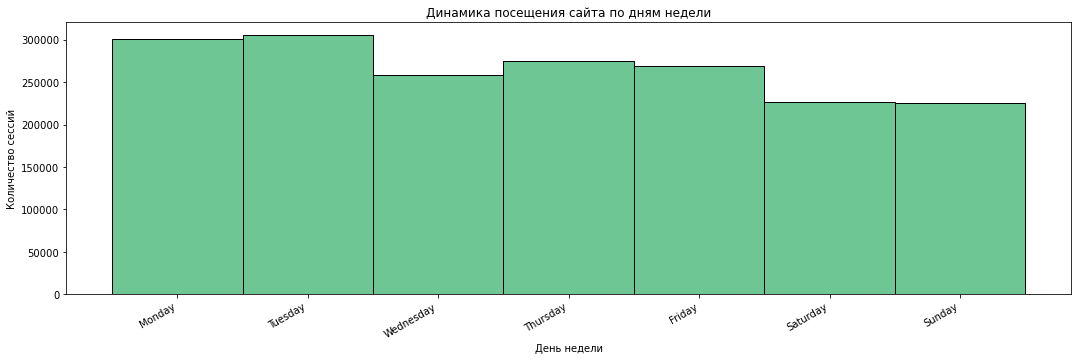

In [104]:
plt.figure(figsize = (18, 5))
a = sns.histplot(data=weekday, x='weekday', discrete=True)
plt.xlabel('День недели')
plt.ylabel('Количество сессий')
plt.xticks(ha='right', rotation=30)
plt.title('Динамика посещения сайта по дням недели');

In [112]:
df_s['month_name'] = df_s.visit_date_time.dt.month_name()
df_s['month'] = df_s.visit_date_time.dt.month
month = df_s[['session_id', 'month_name', 'month']].sort_values(by='month')

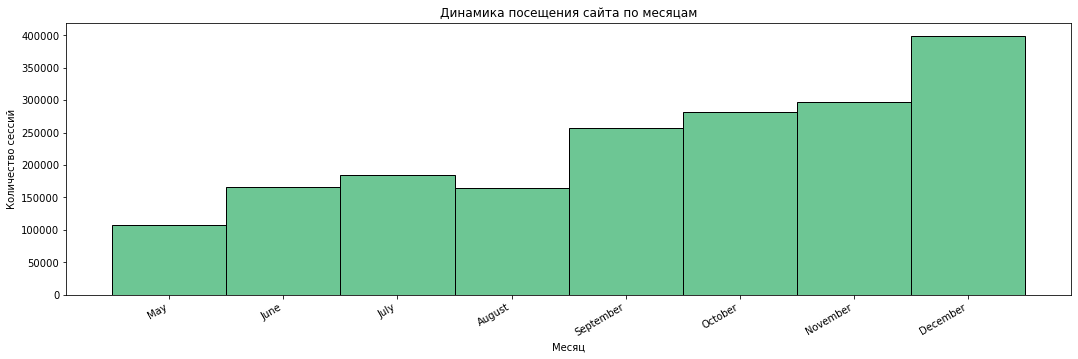

In [113]:
plt.figure(figsize = (18, 5))
sns.histplot(data=month, x='month_name', discrete=True)
plt.xlabel('Месяц')
plt.ylabel('Количество сессий')
plt.xticks(ha='right', rotation=30)
plt.title('Динамика посещения сайта по месяцам');

In [81]:
df_s['hour'] = df_s['visit_date_time'].dt.hour

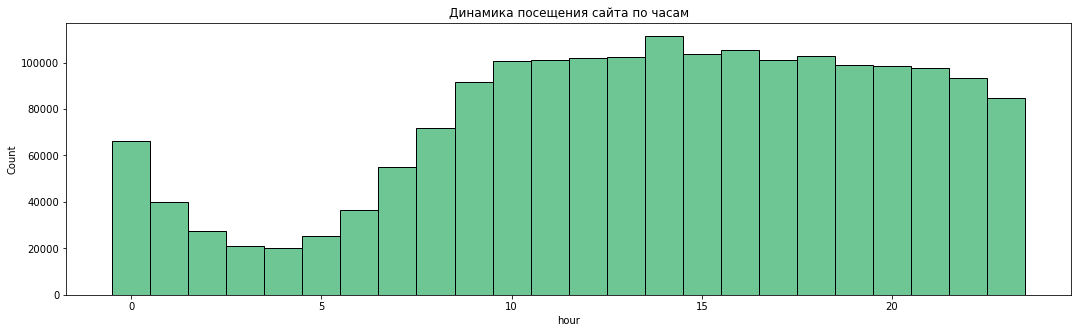

In [82]:
plt.figure(figsize = (18, 5))
sns.histplot(data=df_s, x='hour', discrete=True)
plt.title('Динамика посещения сайта по часам');

In [114]:
visit_stats = df_s.groupby(['month_name', 'month'], as_index=False)[['session_id']].count()
visit_stats = visit_stats.rename(columns={'session_id': 'count'}).sort_values(by='month')
visit_stats

,month_name,month,count
4,May,5,108202
3,June,6,166470
2,July,7,185244
0,August,8,164155
7,September,9,257478
6,October,10,281622
5,November,11,297769
1,December,12,399102


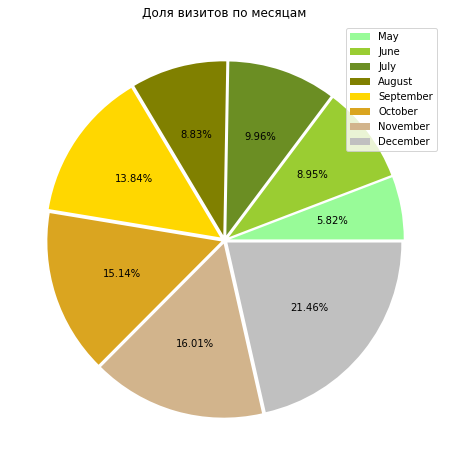

In [115]:
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02]
colors = ['palegreen','yellowgreen', 'olivedrab', 'olive',
          'gold', 'goldenrod', 'tan', 'silver']
plt.figure(figsize=(15, 8))
plt.pie(visit_stats['count'], 
        labels=visit_stats['month_name'], labeldistance=None, autopct = '%.2f%%', colors=colors, explode=explode)
plt.title("Доля визитов по месяцам")
plt.legend()
plt.show();

In [69]:
df_s['date']=pd.to_datetime(df_s.visit_date, utc=True)

Данные представлены за неполные **8 месяцев 2021г.**. А именно, **с 19 мая 2021 по 31 декабря 2021**.

На графиках посещения сайта по ***неделям*** и по ***месяцам*** наблюдается **положительная динамика** визитов. Можно говорить о том, что растущие показатели являются признаком развития кампании. 

Самая небольшая доля посещений приходится на первый месяц работы сайта. Но в мае сайт работал всего лишь 12 дней и именно на эти дни приходится пик посещаемости, что, скорее всего, связано с активной рекламной кампанией и новостями о новом сервисе.

Небольшое **"проседание"** по посещениям отмечается только в ***августе***, природу этого явления, возможно, удасться определить при дальнейшем анализе. **Максимальное** количество визитов пришлось на ***декабрь***. что соответствует общей тенденции. 
Если рассматривать данные с точки зрения посещения ***по дням недели и по времени суток***, то больше всего сессий происходит в начале недели, в середине дня (в обеденное время). Меньше всего визитов совершается в выходные в середине ночи -  в 04:00.

##### Вывод очищенного датасета `ga_sessions`

In [116]:
columns_to_drop_from_sessions = ['client_id', 'visit_number', 'utm_adcontent', 'visit_date_time',
                                 'visit_date', 'visit_time','utm_keyword', 'device_os', 'device_model', 
                                 'device_screen_resolution', 'device_browser', 'week', 'weekday',
                                 'num_weekday', 'month_name','hour']
                                 

dfs_new = df_s.drop(columns_to_drop_from_sessions, axis=1)
print('Размер датафрейма: ', dfs_new.shape)
dfs_new.head()

Размер датафрейма:  (1860042, 13)


,session_id,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_country,geo_city,utm_source_social,traffic_type,region,month,num_month
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Zlatoust,0,paid,Other_Russia,11,11
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Russia,Moscow,1,paid,Moscow,11,11
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Krasnoyarsk,0,paid,Other_Russia,12,12
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Russia,Moscow,0,paid,Moscow,5,5
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Russia,Moscow,0,paid,Moscow,5,5


###### Cохранение очищенного датасета ga_sessions в csv

In [90]:
dfs_new.to_csv('data/ga_sessions_clear.csv', index=False)

**В таблице Датасета событий поле `session_id` являтся внешним ключом. Таким образом, для формирования единого Датасета можно объединить таблицы по полю `session_id`.**